In [2]:
from sklearn import svm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
# 加载数据集
data = pd.read_csv('./data/breast_cancer_data.csv')
# 数据探索
# 因为数据集中列比较多，我们需要把 dataframe 中的列全部显示出来
pd.set_option('display.max_columns',None)
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

* diagnosis: M/B (M：恶性，B：良性）
* redius_mean：半径（点中心到边缘的距离）平均值
* texture_mean：文理（灰度值标准差）平均值
* perimeter_mean：周长 平均值
* area_mean：面积 平均值
* smoothness_mean：平滑程度（半径内的局部变化）平均值
* compactness_mean：紧密度（=周长*周长/面积-1.0）平均值
* concavity_mean：凹度（轮廓的凹部的严重程度）平均值
* concave_points_mean：凹缝（轮廓的凹部分）
* ...

In [4]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


上面表格，mean 代表的是平均值，se 代表的是标准差，worst 代表最大值（3 个最大值的平均值）         
 将特征字段分成 3 组，mean 是平均值，se 是标准差，worst 是最大值

In [6]:
features_mean =list(data.columns[2:12])
features_se =list(data.columns[12:22])
features_worst =list(data.columns[22:32])

数据清洗           
ID 列没有用，删除该列

In [2]:
data.drop("id",axis=1,inplace=True)
# 将 B 良性替换为 0，M 恶性替换为 1
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

将肿瘤诊断结果可视化

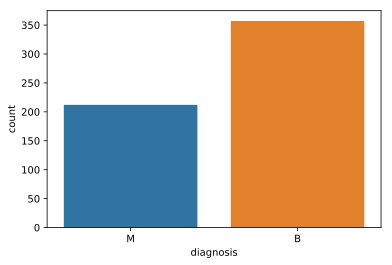

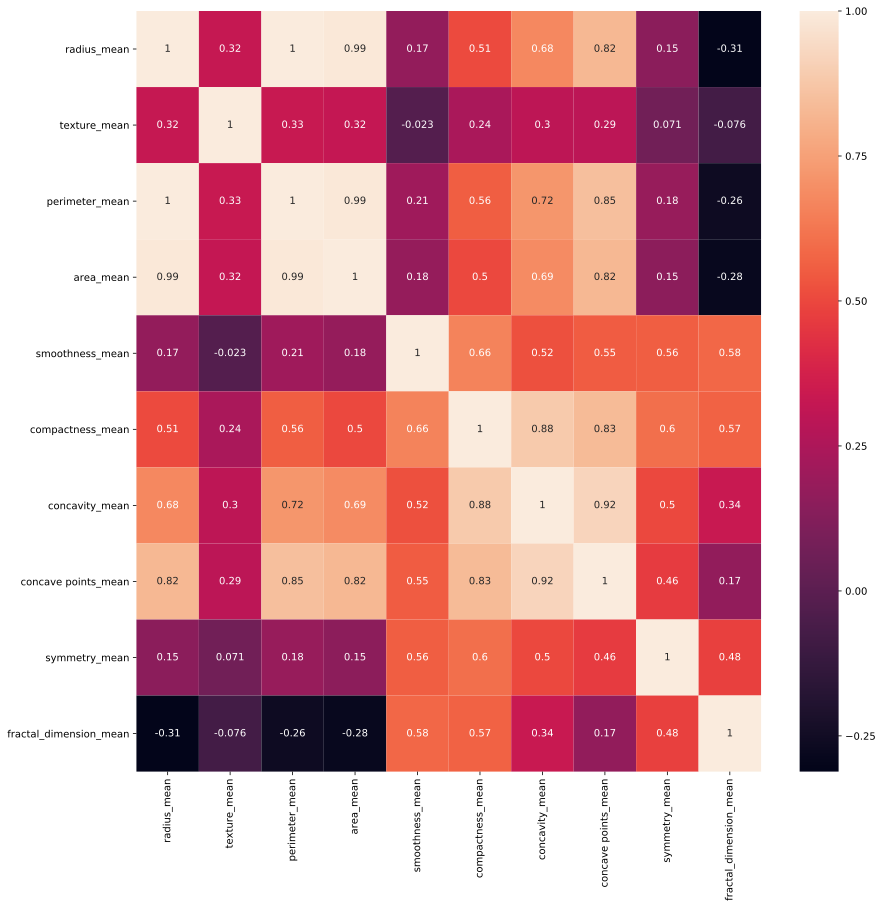

In [10]:
# 将图表设置成矢量图格式显示
% config InlineBackend.figure_format = 'svg'
sns.countplot(data['diagnosis'],label="Count")
plt.show()
# 用热力图呈现 features_mean 字段之间的相关性
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
# annot=True 显示每个方格的数据
sns.heatmap(corr,annot=True)
plt.show()

热力图中对角线上的为单变量自身的相关系数为1。颜色越浅代表相关性越大，所以你看看出来 radius_mean、perimeter_mean 和 area_mean 相关性非常大，compactness_mean，concavity_mean，concave_points_mean 这三个字段也是相关的，因此我们可以取其中一个作为代表。

 特征选择               
特征选择的目的是降维，用少量的特征代表数据的特性，这样也可以增强分类器的泛化能力，避免数据过拟合。            
我们能看到 mean、se 和worst这三组数据是对同一组内容的不同度量，我们可以保留 mean 这个特征，忽略掉 se 和 worst。同事我们能看到 mean 这组特征中，radius_mean、perimeter_mean 和 area_mean 这三个属性相关性大，compactness_mean，concavity_mean，concave_points_mean 这三个属性相关性，我们分别从这两类中选择一个属性作为代表，比如 radius_mean 和  compactness_mean。                

In [12]:
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean']    
# features_remain =data.columns[1:31]
# 抽取 30％ 的数据作为测试集，其余作为训练集
train,test=train_test_split(data,test_size=0.3)

# 抽取特选择的数值作为训练和测试数据
train_X = train[features_remain]
train_Y = train['diagnosis']
test_X = test[features_remain]
test_Y = test['diagnosis']

# 采用 Z-score 规范化数据，保证每个特征维度的数据均值为 0 ，方差为 1
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

SVM 既可以做回归，也可以做分类。
当用 SVM 做回归的时候，我们可以使用 SVR 或者 LinearSVR。SVR：Support Vector Regression。             
当做分类器的时候，我们使用的是 SVC 或者 LinearSVC，SVC：Support Vector Classification                 
前者是一个线性分类器，用于处理线性可分的数据，只能使用线性核函数。针对非线性数据，需要用到 SVC，在 SVC 中，我们既可以使用到线性和函数（进行线性划分），也能使用高维的核函数（进行非线性划分）。     
构造分类器：       
model = svm.SVC(kernel='rbf',C=1.0,gamma='auto')
kernel 代表核函数的选择
1. linear：线性核函数
2. poly：多项式核函数，将数据从低维空间映射到高维空间，但参数较多，计算量大
3. rbf：高斯核函数（默认）相比多项式函数，参数较少，通常性能不错
4. sigmod:sigmoid 核函数          

C 代表目标函数的惩罚系数，惩罚系数指的是分错样本时的惩罚程度，默认为1.0，当 C 越大的时候，分类器的准确性越高，但同样容错率会低，泛华能力变差，相反，C越小，泛化能力越强，但是准确性会降低。       
参数 gamma 代表核函数的系数，默认为样本特征数的倒数。 gamma = 1 / n_features

In [14]:
# 创建 SVM 分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_X,train_Y)
# 用测试集做预测
prediction=model.predict(test_X)
print("准确率：",metrics.accuracy_score(prediction,test_Y))

准确率： 0.9122807017543859


In [15]:
# 创建 LinearSVC 分类器
model1 = svm.LinearSVC()
model1.fit(train_X,train_Y)
prediction1=model1.predict(test_X)
print("准确率：",metrics.accuracy_score(prediction1,test_Y))

准确率： 0.9005847953216374
